In [3]:
#Sentiment Analysis using LSTM in Keras
import numpy as np
import keras
from keras.models import Model,Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence,text
from matplotlib import pyplot


In [4]:
#Data
# Keras has an inbuilt IMDB movie review databse
from keras.datasets import imdb

In [5]:
# set the vocabulary size and load the training data and test data
vocab_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocab_size)
print(X_train.shape)
print(X_test.shape)


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\srini\AppData\Roaming\Python\Python37\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)


C:\Users\srini\AppData\Roaming\Python\Python37\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [6]:
# Print the sample X_train and y_train
print('Sample Review')
print(X_train[1])
print('Sample Label')
print(y_train[1])

Sample Review
[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
Sample Label
0


Note that the review is stored as a sequence of integers. These are word IDs that have been pre-assigned to individual words, and the label is an integer (0 for negative, 1 for positive).

In [7]:
#Maximum review length
max_len = len(max((X_train + X_test ), key=len))
print(max_len)

2697


In [8]:
#Minimum review length
min_len = len(min((X_train+ X_test ), key=len))
print(min_len )

70


Pad sequences

In order to feed this data into our RNN, all input documents must have the same length. We will limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). We can accomplish this using the pad_sequences() function in Keras. 
set max_words to 1000.

In [9]:
max_words = 1000
X_train = sequence.pad_sequences(X_train,maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)


Design an LSTM model for sentiment analysis

We start building our model architecture in the code cell below. 
Input is a sequence of words (technically, integer word IDs) of maximum length = max_words, and our output is a binary sentiment label (0 or 1).

In [10]:
embedding_size=32
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 32)          160000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


Compile

We first need to compile our model by specifying the loss function and optimizer we want to use while training, as well as any evaluation metrics. Specify the appropriate parameters, including at least one metric ‘accuracy’.

In [11]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

Train the model

In [12]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32,epochs=2)

Epoch 1/2
782/782 [==============================] - 861s 1s/step - loss: 0.5167 - accuracy: 0.7278 - val_loss: 0.3694 - val_accuracy: 0.8554
Epoch 2/2
782/782 [==============================] - 740s 946ms/step - loss: 0.2957 - accuracy: 0.8818 - val_loss: 0.3571 - val_accuracy: 0.8488


(0.7, 1.2)

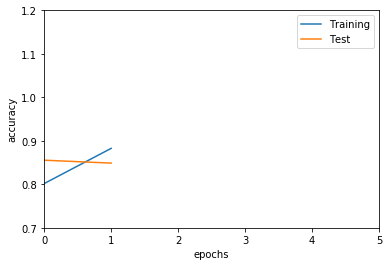

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Training','Test'], loc='upper right')
plt.xlim([0,5])
plt.ylim([0.7,1.2])

In [14]:
model.save("sentimentanalysis.h5")  

In [15]:
# Testing with unknown review data Case_study_1

d = imdb.get_word_index()
review = "this movie is fantastic !i really like it because it is good!"
words = review.split()
review = []
for word in words:
  if word not in d: 
    review.append(2)
  else:
    review.append(d[word]+3) 
review = sequence.pad_sequences([review], maxlen = max_len)
#print(review)
prediction = model.predict(review)
print(prediction)

[[0.73444605]]


In [16]:
# Testing with unknown review data Case_study_2
d = imdb.get_word_index()
review = "The movie was a great waste of my time"
words = review.split()
review = []
for word in words:
  if word not in d: 
    review.append(2)
  else:
    review.append(d[word]+3) 
review = sequence.pad_sequences([review], maxlen = max_len)
#print(review)
prediction = model.predict(review)
print(prediction)

[[0.20934245]]
